# Lecture 3: Accuracy in Fourier's Space

In [1]:
%matplotlib inline 
# plots graphs within the notebook
%config InlineBackend.figure_format='svg' # not sure what this does, may be default images to svg format

from IPython.display import Image

from IPython.core.display import HTML
def header(text):
    raw_html = '<h4>' + str(text) + '</h4>'
    return raw_html

def box(text):
    raw_html = '<div style="border:1px dotted black;padding:2em;">'+str(text)+'</div>'
    return HTML(raw_html)

def nobox(text):
    raw_html = '<p>'+str(text)+'</p>'
    return HTML(raw_html)

def addContent(raw_html):
    global htmlContent
    htmlContent += raw_html
    
class PDF(object):
  def __init__(self, pdf, size=(200,200)):
    self.pdf = pdf
    self.size = size

  def _repr_html_(self):
    return '<iframe src={0} width={1[0]} height={1[1]}></iframe>'.format(self.pdf, self.size)

  def _repr_latex_(self):
    return r'\includegraphics[width=1.0\textwidth]{{{0}}}'.format(self.pdf)

class ListTable(list):
    """ Overridden list class which takes a 2-dimensional list of 
        the form [[1,2,3],[4,5,6]], and renders an HTML Table in 
        IPython Notebook. """
    
    def _repr_html_(self):
        html = ["<table>"]
        for row in self:
            html.append("<tr>")
            
            for col in row:
                html.append("<td>{0}</td>".format(col))
            
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)
    
font = {'family' : 'serif',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 18,
        }



<h1>Discrete Fourier Series</h1>

Consider a function $f$ periodic over a domain $0\leq x\leq 2\pi$, discretized by $N_x$ points. The longest wavelength wave that can be contained in the domain is $L_x$. A phyiscal understanding of Fourier series is the representation of a system as the sum of many waves fo wavelengths smaller or equal to $L_x$. In a discrete sense, the series of wave used to decompose the system is defined as:
$$
a_n\exp\left(\hat{\jmath}\frac{2\pi n}{Lx}\right)
$$
such that
<p class='alert alert-danger'>
$$
f(x) = \sum_{n=-\infty}^{\infty}a_n\exp\left(\hat{\jmath}\frac{2\pi nx}{Lx}\right)
$$
</p>
and 
<p class='alert alert-danger'>
$$
a_n = \frac{1}{L_x}\int_Lf(x)\exp\left(-\hat{\jmath}\frac{2\pi nx}{Lx}\right)dx
$$
</p>
Often the reduction to wavenumber is used, where
<p class='alert alert-danger'>
$$
k_n = \frac{2\pi n}{L_x}
$$
</p>
Note that if $x$ is time instead of distance, $L_x$ is a time $T$ and the smallest frequency contained in the domain is $f_0=1/T_0$ and the wavenumber $n$ is $k_n=2\pi f_0n=2\pi f_n$ with $f_n$ for $\vert n\vert >1$ are the higher frequencies. 


<h1>Discrete Fourier Transform (DFT)</h1>

In scientific computing we are interested in applying Fourier series on vectors or matrices, containing a integer number of samples. The DFT is the fourier series for the number of samples. DFT functions available in python or any other language only care about the number of samples, therefore the wavenumber is 
<p class='alert alert-danger'>
$$
k_n=\frac{2\pi n}{N_x}
$$
</p>
Consider a function $f$ periodic over a domain $0\leq x\leq 2\pi$, discretized by $N_x$ points. The nodal value is $f_i$ located at $x_i=(i+1)\Delta x$ with $\Delta x=L_x/Nx$. The DFT is defined as
<p class='alert alert-danger'>
$$
\hat{f}_k=\sum_{i=0}^{N_x-1}f_i\exp\left(-2\pi\hat{\jmath}\frac{ik}{N_x}\right)
$$
</p>
The inverse DFT is defined as
<p class='alert alert-danger'>
$$
f_i=\sum_{k=0}^{N_x-1}\hat{f}_k\exp\left(2\pi\hat{\jmath}\frac{ik}{N_x}\right)
$$
</p>

<h1>Fast Fourier Transform (FFT)</h1>
Using symmetries, the FFT reduces computational costs and stores in the following way:
<p class='alert alert-danger'>
$$
\hat{f}_k=\sum_{i=-Nx/2+1}^{N_x/2}f_i\exp\left(-2\pi\mathbf{j}\frac{ik}{N_x}\right)
$$
</p>
<p class='alert alert-info'>
Compared to the Fourier series, DFT or FFT assumes that the system can be accurately captured by a finite number of waves. It is up to the user to ensure that the number of computational points is sufficient to capture the smallest scale, or smallest wavelength or highest frequence. Remember that the function on which FT is applied must be periodic over the domain and the grid spacing must be uniform.
</p>
There are FT algorithms for unevenly space data, but this is beyond the scope of this notebook.


<h1>Example 1: Filtering</h1>

The following provides examples of low- and high-pass filters based on Fourier transform. A ideal low-(high-) pass filter passes frequencies that are lower than a threshold without attenuation and removes frequencies that are higher than the threshold. 

When applied to spatial data (function of $x$ rather than $t$-time), the FT (Fourier Transform) of a variable is function of wavenumbers
$$
k_n=\frac{2\pi n}{L_x}
$$
or wavelengths
$$
\lambda_n=\frac{2\pi}{k_n}
$$

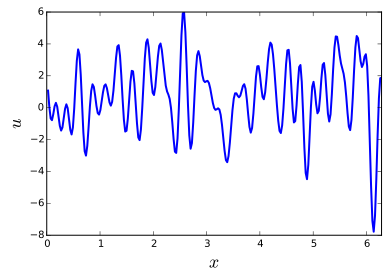

In [302]:
import matplotlib.pyplot as plt
import numpy as np

Lx = 2.*np.pi
Nx = 256
u = np.zeros(Nx,dtype='float64')
du = np.zeros(Nx,dtype='float64')
ddu = np.zeros(Nx,dtype='float64')
k_0 = 2.*np.pi/Lx 
x = np.linspace(Lx/Nx,Lx,Nx)
Nwave = 32
uwave = np.zeros((Nx,Nwave),dtype='float64')
duwave = np.zeros((Nx,Nwave),dtype='float64')
dduwave = np.zeros((Nx,Nwave),dtype='float64')
#ampwave = np.array([0., 1.0, 2.0, 3.0])
ampwave = np.random.random(Nwave)
#print(ampwave)
#phasewave = np.array([0.0, 0.0, np.pi/2, np.pi/2])
phasewave = np.random.random(Nwave)*2*np.pi
#print(phasewave)
for iwave in range(Nwave):
    uwave[:,iwave] = ampwave[iwave]*np.cos(k_0*iwave*x+phasewave[iwave])
    duwave[:,iwave] = -k_0*iwave*ampwave[iwave]*np.sin(k_0*iwave*x+phasewave[iwave])
    dduwave[:,iwave] = -(k_0*iwave)**2*ampwave[iwave]*np.cos(k_0*iwave*x+phasewave[iwave])
u = np.sum(uwave,axis=1)
#print(u)
plt.plot(x,u,lw=2)
plt.xlim(0,Lx)
plt.legend(loc=3, bbox_to_anchor=[0, 1],
           ncol=3, shadow=True, fancybox=True)
plt.xlabel('$x$', fontdict = font)
plt.ylabel('$u$', fontdict = font)
plt.show()
plt.show()

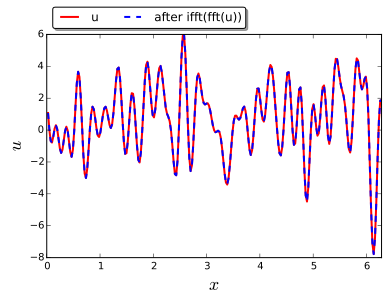

('error', 1.7763568394002505e-15)


In [303]:
#check FT^-1(FT(u))
u_hat = np.fft.fft(u)
v = np.real(np.fft.ifft(u_hat))

plt.plot(x,u,'r-',lw=2,label='u')
plt.plot(x,v,'b--',lw=2,label='after ifft(fft(u))')
plt.xlim(0,Lx)
plt.legend(loc=3, bbox_to_anchor=[0, 1],
           ncol=3, shadow=True, fancybox=True)
plt.xlabel('$x$', fontdict = font)
plt.ylabel('$u$', fontdict = font)
plt.show()
print('error',np.linalg.norm(u-v,np.inf))


<h2>Spectrum</h2>

For now we will define the spectrum f $f$ as
<p class='alert alert-danger'>
$$
F(k_n) = \hat{f}_n.\hat{f}_n^* 
$$
</p>
which can be interpreted as the energy contained in the $k_n$ wavenumber. This is helpful when searching for the most energitic scales or waves in our system. Thanks to the symmetries of the FFT, the spectrum is defined over $n=0$ to $N_x/2$

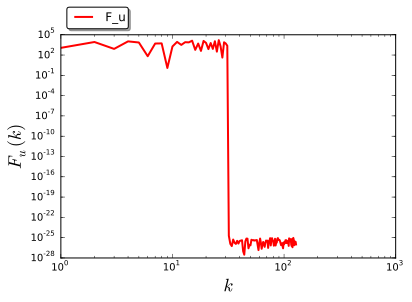

<function matplotlib.pyplot.show>

In [305]:
F = np.zeros(Nx/2+1,dtype='float64')
F = np.real(u_hat[0:Nx/2+1]*np.conj(u_hat[0:Nx/2+1]))
k = np.hstack((np.arange(0,Nx/2+1),np.arange(-Nx/2+1,0)))
plt.loglog(k[0:Nx/2+1],F,'r-',lw=2,label='F_u')
plt.legend(loc=3, bbox_to_anchor=[0, 1],
           ncol=3, shadow=True, fancybox=True)
plt.xlabel('$k$', fontdict = font)
plt.ylabel('$F_u(k)$', fontdict = font)
plt.show()
plt.show

<h2>Low-Pass Filter</h2>

The following code filters the original signal by half the wavenumbers using FFT and compares to exact filtered function

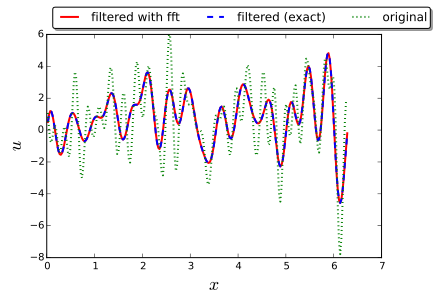

('error:', 2.4202861936828413e-14)


In [316]:
# filtering the smaller waves
def low_pass_filter_fourier(a,k,kcutoff):
    N = a.shape[0]
    a_hat = np.fft.fft(u)
    filter_mask = np.where(np.abs(k) > kcut)
    a_hat[filter_mask] = 0.0 + 0.0j
    a_filter = np.real(np.fft.ifft(a_hat))
    return a_filter
kcut=Nwave/2+1
k = np.hstack((np.arange(0,Nx/2+1),np.arange(-Nx/2+1,0)))
v = low_pass_filter_fourier(u,k,kcut)
u_filter_exact = np.sum(uwave[:,0:kcut+1],axis=1)
plt.plot(x,v,'r-',lw=2,label='filtered with fft')
plt.plot(x,u_filter_exact,'b--',lw=2,label='filtered (exact)')
plt.plot(x,u,'g:',lw=2,label='original')
plt.legend(loc=3, bbox_to_anchor=[0, 1],
           ncol=3, shadow=True, fancybox=True)
plt.xlabel('$x$', fontdict = font)
plt.ylabel('$u$', fontdict = font)
plt.show()
print('error:',np.linalg.norm(v-u_filter_exact,np.inf))

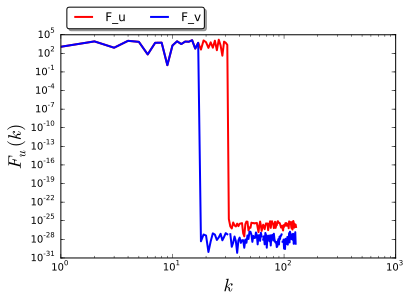

<function matplotlib.pyplot.show>

In [317]:
F = np.zeros(Nx/2+1,dtype='float64')
F_filter = np.zeros(Nx/2+1,dtype='float64')
u_hat = np.fft.fft(u)
F = np.real(u_hat[0:Nx/2+1]*np.conj(u_hat[0:Nx/2+1]))
v_hat = np.fft.fft(v)
F_filter = np.real(v_hat[0:Nx/2+1]*np.conj(v_hat[0:Nx/2+1]))
k = np.hstack((np.arange(0,Nx/2+1),np.arange(-Nx/2+1,0)))
plt.loglog(k[0:Nx/2+1],F,'r-',lw=2,label='F_u')
plt.loglog(k[0:Nx/2+1],F_filter,'b-',lw=2,label='F_v')
plt.legend(loc=3, bbox_to_anchor=[0, 1],
           ncol=3, shadow=True, fancybox=True)
plt.xlabel('$k$', fontdict = font)
plt.ylabel('$F_u(k)$', fontdict = font)
plt.show()
plt.show

<h2> High-Pass Filter</h2>

From the example below, develop a function for a high-pass filter.

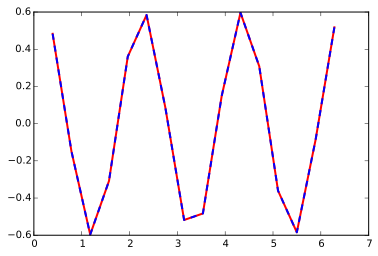

In [261]:
u_hat = np.fft.fft(u)
kfilter = 3
k = np.linspace(0,Nx-1,Nx)
filter_mask = np.where((k < kfilter) | (k > Nx-kfilter) )
u_hat[filter_mask] = 0.+0.j
v = np.real(np.fft.ifft(u_hat))
plt.plot(x,v,'r-',lw=2)
plt.plot(x,uwave[:,3],'b--',lw=2)
plt.show()